In [1]:
# RAG Pipeline Showcase Notebook (Interactive, Minimal Display)

from dotenv import load_dotenv

from sp_rag.core.retrievers import RetrievalStrategy
from sp_rag.rag.adaptive import AdaptiveRAG
from sp_rag.rag.agentic import AgenticRAG
from sp_rag.rag.simple import SimpleRAG
from sp_rag.vectordb.qdrant import QdrantVectorDB

load_dotenv(override=True)

True

In [2]:
%%capture

url = "localhost:6333"
db = QdrantVectorDB(url=url, collection="arxiv_papers")
vectorstore = db.vector_store


In [3]:
# -- Define Retrieval Strategy --
retrieval_strategy = RetrievalStrategy.SIMPLE

# -- Run SimpleRAG --
simple_rag = SimpleRAG(vectorstore, retrieval_strategy)
query = "What are recent advancements in semantic segmentation for medical imaging?"
simple_answer = simple_rag.invoke(query)
print("\n--- SimpleRAG Answer ---")
print(simple_answer)



--- SimpleRAG Answer ---
content='Recent advancements in semantic segmentation for medical imaging include the development of transformer-based models such as Segformer, which have gained attention for their strong performance in segmentation tasks. Additionally, methods like BIT-CD and SARAS-Net have been proposed as promising approaches for change detection using semantic segmentation, achieving state-of-the-art results in this area.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 3706, 'total_tokens': 3772, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_9654a743ed', 'id': 'chatcmpl-BJmvuQTqBPgpM704X6pjlRxCxf2bJ', 'finish_reason': 'stop', 'logprobs': None} id='run-3f744eeb-3430-497c-89a9-57f8fb73d

2025-04-07 22:08:06.699 | INFO     | sp_rag.rag.adaptive:__init__:38 - Initializing AdaptiveRAG pipeline...
2025-04-07 22:08:07.771 | INFO     | sp_rag.rag.base:print_graph:30 - Rendering graph visualization.


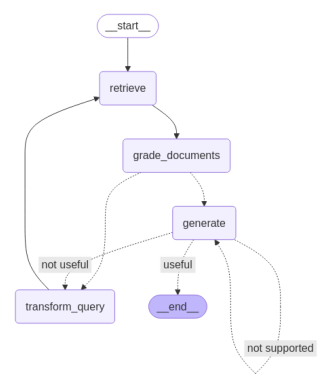

In [4]:
# -- Run AdaptiveRAG --
adaptive_rag = AdaptiveRAG(vectorstore, retrieval_strategy)
adaptive_rag.print_graph()

In [5]:

adaptive_answer = adaptive_rag.invoke(query)
print("\n--- AdaptiveRAG Answer ---")
print(adaptive_answer)

2025-04-07 22:08:10.479 | INFO     | sp_rag.rag.adaptive:invoke:173 - Invoking AdaptiveRAG pipeline with question: What are recent advancements in semantic segmentation for medical imaging?
2025-04-07 22:08:10.485 | INFO     | sp_rag.rag.adaptive:retrieve:73 - Starting retrieval step.
2025-04-07 22:08:10.526 | INFO     | sp_rag.rag.adaptive:grade_documents:79 - Grading document relevance.
2025-04-07 22:08:11.127 | INFO     | sp_rag.rag.adaptive:grade_documents:86 - Document deemed relevant.
2025-04-07 22:08:11.539 | INFO     | sp_rag.rag.adaptive:grade_documents:89 - Document deemed not relevant.
2025-04-07 22:08:12.034 | INFO     | sp_rag.rag.adaptive:grade_documents:89 - Document deemed not relevant.
2025-04-07 22:08:12.560 | INFO     | sp_rag.rag.adaptive:grade_documents:86 - Document deemed relevant.
2025-04-07 22:08:12.562 | INFO     | sp_rag.rag.adaptive:decide_next_step:110 - Assessing documents to decide next step.
2025-04-07 22:08:12.562 | INFO     | sp_rag.rag.adaptive:decide


--- AdaptiveRAG Answer ---
Recent advancements in semantic segmentation for medical imaging include the development of transformer-based models like Segformer, which have shown strong performance in segmentation tasks. Additionally, hybrid strategies such as EPEE (Entropy- and Patience-based Early Exiting) have been proposed to improve inference efficiency while maintaining accuracy in real-time clinical settings. These innovations aim to enhance the applicability of deep learning models in diverse biomedical tasks.


2025-04-07 22:10:19.485 | INFO     | sp_rag.rag.agentic:__init__:28 - Initializing AgenticRAG...
2025-04-07 22:10:19.559 | INFO     | sp_rag.rag.base:print_graph:30 - Rendering graph visualization.


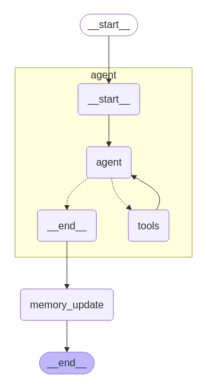

In [6]:
# -- Run AgenticRAG --
agentic_rag = AgenticRAG(vectorstore, retrieval_strategy)
agentic_rag.print_graph()

In [7]:
agentic_answer = agentic_rag.invoke(query)
print("\n--- AgenticRAG Answer ---")
print(agentic_answer)

2025-04-07 22:10:59.157 | INFO     | sp_rag.rag.agentic:invoke:105 - Invoking AgenticRAG pipeline with question: What are recent advancements in semantic segmentation for medical imaging?
2025-04-07 22:11:09.779 | INFO     | sp_rag.rag.agentic:memory_update:81 - Running summarization node...



--- AgenticRAG Answer ---
To summarize the recent advancements in semantic segmentation for medical imaging, I conducted a search focusing on the latest research and developments in this area. I used various formulations of the query to ensure comprehensive coverage, including terms like "semantic segmentation," "medical imaging," and "recent advancements." 

Here are the key findings:

1. **Transformer-Based Models**: Recent studies have highlighted the effectiveness of transformer architectures in medical image segmentation. For instance, models like U-Net Transformer and UNETR have been developed to leverage self-attention mechanisms, improving segmentation accuracy and efficiency.

2. **Multi-Modal Approaches**: The integration of multi-modal data (e.g., combining different imaging modalities) has been explored to enhance segmentation performance. This includes methods that utilize both visual and textual data for better contextual understanding.

3. **Open-Vocabulary Segmentation